**SIMPLE LINEAR REGRESSION**

In [1]:
#Simple Linear Regression
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
ds=pd .read_csv('SLR_sales.csv')
ds

,Advertising costs ($),Sales ($)
0,40,385
1,20,400
2,25,395
3,20,365
4,30,475
5,50,440
6,40,490
7,20,420
8,50,560
9,40,525


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Advertising costs ($)  12 non-null     int64
 1   Sales ($)              12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [3]:
#x=ds.iloc[:,:-1].values #Volume
#x=ds.iloc[:,0:1].values #Volume
x=ds.iloc[:,[0]].values 
y=ds.iloc[:,1].values #Price
#print(x)
#print(y)

In [4]:
#x=ds.iloc[:,:-1].values #Volume
#x=ds.iloc[:,0:1].values #Volume
x=ds.iloc[:,[0]].values 
y=ds.iloc[:,1].values #Price

#calculate the correlation coefficient for the dataset
corr = ds.corr()
print(corr)

                       Advertising costs ($)  Sales ($)
Advertising costs ($)               1.000000   0.634837
Sales ($)                           0.634837   1.000000


In [5]:
#splitting the dataset into training and test sets
#use 20% for testing data
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split (x, y, test_size = 0.2,
random_state = 0)

In [6]:
#SLR Step 2
#Fitting simple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

print('Coefficient,beta:',regressor.coef_)
print('Constant,alpha:', regressor.predict([[0]]))

Coefficient,beta: [3.10425532]
Constant,alpha: [341.08510638]


In [7]:
#Predicting the results for test set-Step 3
y_pred=regressor.predict(x_test)

In [8]:
print(y_pred) #predicted y

[465.25531915 496.29787234 434.21276596]


In [9]:
print(y_test) #actual y

[490 510 475]


In [10]:
#calculate the correlation coefficient
corr=np.corrcoef(y_pred, y_test)
print(corr)

[[1.        0.9966159]
 [0.9966159 1.       ]]


In [11]:
#CALCULATE THE MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(MSE) #don't use for classification

821.2153312207662


In [12]:
#calculate the correlation coefficient
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
corr = df.corr()
print(corr)

             Actual  Predicted
Actual     1.000000   0.996616
Predicted  0.996616   1.000000


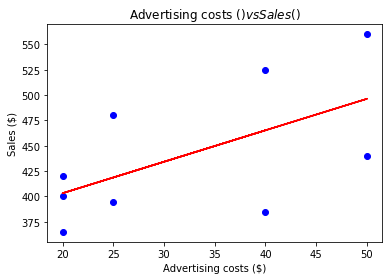

In [14]:
#Simple Linear Regression - Step 4
#Visualizing Training set result
plt.scatter(x_train,y_train,color ='blue') # plot the points
plt.plot(x_train,regressor.predict (x_train),color='red') # plot the line
plt.title('Advertising costs ($)  vs  Sales ($)')
plt.xlabel('Advertising costs ($)')
plt.ylabel('Sales ($)')
plt.show()

Is the line fitting well to the observation?

Answer: Yes. The graph of Price vs Volume shows that there is a moderate positive relationship between advertising costs and sales.

**Estimate the weekly sales when advertising costs are $35.**

In [15]:
y_predict=regressor.predict ([[35]])
print(y_predict)

[449.73404255]
